# Plotting activation of ensembles in an example session

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from neuropy.analyses import NeuronEnsembles
import subjects

sess = subjects.sd.ratUday4[0]

In [ ]:
neurons = sess.neurons.get_neuron_type('pyr')
pre = sess.paradigm['pre']
maze = sess.paradigm['maze']
re_maze= sess.paradigm['re-maze']
post = sess.paradigm['post']

maze_ensembles =  NeuronEnsembles(neurons,maze[0],maze[1],bin_size=0.25)
maze_ensembles.calculate_activation(pre[0],pre[1])
mean_pre_activation = np.mean(maze_ensembles.activation,axis=1,keepdims=True)
maze_ensembles.calculate_activation(post[0],re_maze[1])

In [ ]:
%matplotlib widget

maze_ensembles.plot_activation()
# plt.plot(np.mean(maze_ensembles.activation-mean_pre_activation,axis=0))

In [ ]:
%matplotlib widget
from scipy import stats
a = maze_ensembles.weights 
a_zsc = stats.zscore(a,axis=0) 
a_sig_logical = np.where(a_zsc>1.5,1,0)
b = np.sort(a_sig_logical,axis=0)
# maze_ensembles.plot_ensembles()
c = np.lexsort(a_sig_logical.T)
a_new = a[c,:]
plt.pcolormesh(a_new)

In [ ]:
np.lexsort(a_sig_logical.T)

# Comparing MAZE ensembles and last 3 hours of SD

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from neuropy.analyses import NeuronEnsembles
import subjects

sd_sessions = subjects.sd.ratNday1+subjects.sd.ratSday3 + subjects.sd.ratUday4
nsd_sessions = subjects.nsd.ratNday2+subjects.nsd.ratSday2 + subjects.nsd.ratUday2

In [84]:
sd_ensembles_corr = []
for sess in sd_sessions:
    neurons = sess.neurons.get_neuron_type('pyr')
    pre = sess.paradigm['pre']
    maze = sess.paradigm['maze']
    re_maze= sess.paradigm['re-maze']
    post = sess.paradigm['post']
    # sd= sess.paradigm['sd']
    sd = [post[0],post[0]+5*3600]


    maze_ensembles =  NeuronEnsembles(neurons,maze[0],maze[1],bin_size=0.25)
    sd_ensembles =  NeuronEnsembles(neurons,sd[0]+3*3600,sd[1],bin_size=0.25)

    maze_weights =np.zeros((neurons.n_neurons,maze_ensembles.n_ensembles)) 
    sd_weights =np.zeros((neurons.n_neurons,sd_ensembles.n_ensembles)) 

    maze_indx= np.isin(neurons.neuron_ids,maze_ensembles.neurons.neuron_ids)
    sd_indx= np.isin(neurons.neuron_ids,sd_ensembles.neurons.neuron_ids)

    maze_weights[maze_indx] = maze_ensembles.weights
    sd_weights[sd_indx] = sd_ensembles.weights

    combined_weights = np.hstack((maze_weights,sd_weights))
    l = combined_weights.shape[1]//2
    # corr = np.corrcoef(combined_weights.T)[l:,:l]
    corr = np.corrcoef(combined_weights.T)[maze_ensembles.n_ensembles:,:maze_ensembles.n_ensembles]


    sd_ensembles_corr.append(corr.reshape(-1))

nsd_ensembles_corr = []
for sess in nsd_sessions:
    neurons = sess.neurons.get_neuron_type('pyr')
    pre = sess.paradigm['pre']
    maze = sess.paradigm['maze']
    re_maze= sess.paradigm['re-maze']
    post = sess.paradigm['post']
    # sd= sess.paradigm['sd']
    sd = [post[0],post[0]+5*3600]


    maze_ensembles =  NeuronEnsembles(neurons,maze[0],maze[1],bin_size=0.25)
    sd_ensembles =  NeuronEnsembles(neurons,sd[0]+3*3600,sd[1],bin_size=0.25)

    maze_weights =np.zeros((neurons.n_neurons,maze_ensembles.n_ensembles)) 
    sd_weights =np.zeros((neurons.n_neurons,sd_ensembles.n_ensembles)) 

    maze_indx= np.isin(neurons.neuron_ids,maze_ensembles.neurons.neuron_ids)
    sd_indx= np.isin(neurons.neuron_ids,sd_ensembles.neurons.neuron_ids)

    maze_weights[maze_indx] = maze_ensembles.weights
    sd_weights[sd_indx] = sd_ensembles.weights

    combined_weights = np.hstack((maze_weights,sd_weights))
    l = combined_weights.shape[1]//2
    corr = np.corrcoef(combined_weights.T)[maze_ensembles.n_ensembles:,:maze_ensembles.n_ensembles]

    nsd_ensembles_corr.append(corr.reshape(-1))

sd_ensembles_corr = np.concatenate(sd_ensembles_corr)
nsd_ensembles_corr = np.concatenate(nsd_ensembles_corr)

Based on frate_thresh, excluded neuron_ids: [56 58 62 63 64 65 66 67 68 70]
Based on frate_thresh, excluded neuron_ids: [146]
Based on frate_thresh, excluded neuron_ids: [84]
Based on frate_thresh, excluded neuron_ids: [ 50  56  57 224]
Based on frate_thresh, excluded neuron_ids: [50 57]
Based on frate_thresh, excluded neuron_ids: [137 148]
Based on frate_thresh, excluded neuron_ids: [17]
Based on frate_thresh, excluded neuron_ids: [100]
Based on frate_thresh, excluded neuron_ids: [ 80 114 142 282]
Based on frate_thresh, excluded neuron_ids: [114 142 282]


In [80]:
combined_weights.shape

(174, 59)

Text(0.5, 1.0, 'Correlation of ensembles: MAZE vs ZT(3 to 5)')

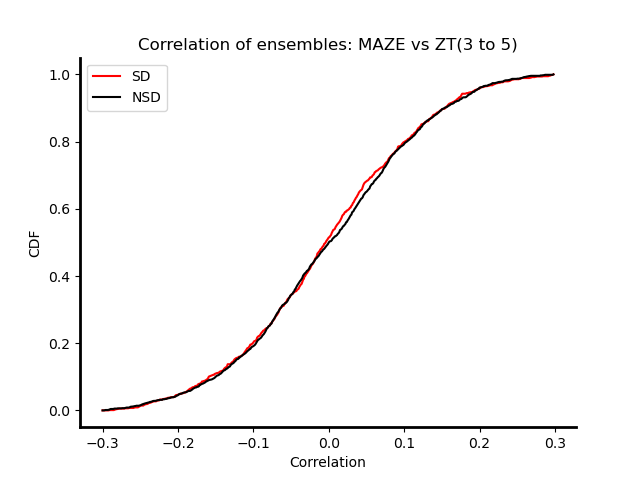

In [88]:
%matplotlib widget
from neuropy.plotting import Fig

_,axes = plt.subplots(1,1)
# axes = axes.reshape(-1)

# for i,corr in enumerate():
#     np.fill_diagonal(corr,0)
#     axes[i].pcolormesh(corr,vmax=0.3,vmin=-0.3,cmap='jet')
colors = ['r','k']
bins = np.arange(-0.3,0.3,0.001)
for i,corr_vals in enumerate([sd_ensembles_corr,nsd_ensembles_corr]):

    hist_corr = np.histogram(corr_vals,bins)[0]
    pdf = hist_corr/np.sum(hist_corr)
    cdf = np.cumsum(pdf)

    axes.plot(bins[:-1],cdf,color = colors[i])
    Fig.remove_spines(axes)
    Fig.set_spines_width(axes) 

axes.set_xlabel('Correlation')
axes.set_ylabel('CDF')
axes.legend(['SD','NSD'])
axes.set_title('Correlation of ensembles: MAZE vs ZT(3 to 5)')